*JJ McCauley*

# Classification on the Breast Cancer Dataset
### Optimizing a Baseline Classifier

In [33]:
''' Using Naive Bayes Classifier as Baseline, Loading Dataset, & Importing necessary dependencies '''
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

# Loading in data and splitting
loaded_bc_data = load_breast_cancer()
X = loaded_bc_data.data
y = loaded_bc_data.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Printing Num of feautes for hyperparameter tuning
print(X.shape[1]) 

# Printing Loaded Data to see how data is represented
print(X, "\n", y)  # Data is standardized and targets are 0, 1, so no modification is needed

# Using Naive Bayes Classifier as accuracy baseline
nbc_model1 = GaussianNB()
nbc_model1.fit(x_train, y_train)
nbc_model1_y_pred = nbc_model1.predict(x_test)
print(f"Baseline score for nbc_model1: {nbc_model1.score(x_test, y_test)}")

30
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1

In [48]:
''' Defining Early Stopping Callback '''
# Defining an Early Stopping Function (credit to Logan Kelsch for the idea)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Monitor Validation Accuracy
    patience=12,             # Wait 12 Epochs for Improvement
    restore_best_weights=True
)

In [54]:
''' ANN Model 1 '''
# Initializing ANN through tensorflow
adam_optimizier = tf.keras.optimizers.Adam(learning_rate=.001)
ANN_model1 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(30,)),  # Input Layer - Each Feature to a Node
    tf.keras.layers.Dense(120, activation='relu'),  # First Dense Layer
    tf.keras.layers.Dense(30, activation='relu'),  # Second Dense Layer
    tf.keras.layers.Dense(15, activation='relu'),  # Third Dense Layer
    tf.keras.layers.Dense(2, activation='softmax'),  # Last Dense Layer, classify as yes or no
])

ANN_model1.compile(optimizer=adam_optimizier, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ANN_model1.fit(x=x_train, y=y_train, validation_data=[x_test, y_test], epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4743 - loss: 22.5972 - val_accuracy: 0.9357 - val_loss: 0.2067
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7378 - loss: 1.2829 - val_accuracy: 0.9123 - val_loss: 0.5786
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8539 - loss: 0.9781 - val_accuracy: 0.9474 - val_loss: 0.2675
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8973 - loss: 0.5685 - val_accuracy: 0.9474 - val_loss: 0.1733
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8892 - loss: 0.3764 - val_accuracy: 0.9415 - val_loss: 0.1724
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8911 - loss: 0.3031 - val_accuracy: 0.9357 - val_loss: 0.2121
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9205 - loss: 0.2581 - val_accuracy: 0.8070 - val_loss: 0.4145
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8280 - loss: 0.5060 - val_accuracy: 0.9474 -

In [ ]:
''' Optimizing Logicstic Regression Model '''
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")  # Ignore Warnings for grid search since some configurations are not compatible

# Running Grid Search CV on Logistic Regression to find best parameters
log_r_model = LogisticRegression(max_iter=250, random_state=42)
params = {
    'C':[i for i in np.arange(.8, 1.3, .1)],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg']
}
grid_search_logr = GridSearchCV(log_r_model, params, cv=5, n_jobs=-1, error_score=np.nan)  # Supress Warnings
grid_search_logr.fit(X, y)

# Getting best estimator and finding score
print(f"Best Logistic Regression Model: {grid_search_logr.best_params_}  with score {grid_search_logr.best_score_}")
log_r_model_optimal = grid_search_logr.best_estimator_
print(f"Logistic Regression Score: {log_r_model_optimal.score(x_test, y_test)}")

Best Logistic Regression Model: {'C': 1.1, 'penalty': 'l2', 'solver': 'liblinear'}  with score 0.9543238627542309
Logistic Regression Score: 0.9707602339181286


Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



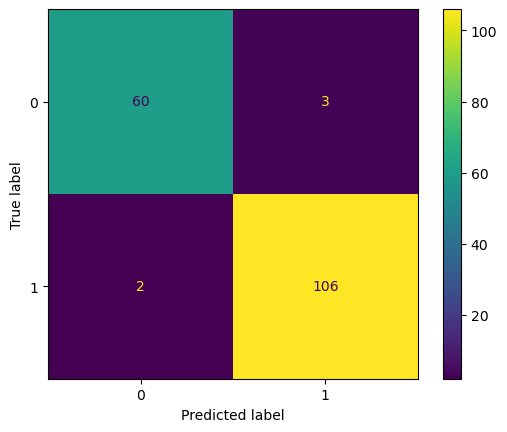

In [61]:
''' Making Classification Report + Confusion Matrix for Best Estimator (Logistic Regression) '''
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Getting Prediction from Logistic Regression Model
y_pred_1 = log_r_model_optimal.predict(x_test)

# Outputting Classification Report
print(f"Classification Report for Logistic Regression Model:\n{classification_report(y_test, y_pred_1)}")

# Displaying Confusion Matrix
cm_1 = confusion_matrix(y_test, y_pred_1)
dispcm_1 = ConfusionMatrixDisplay(cm_1)
dispcm_1.plot()
plt.show()

### Optimizing Ensemble Classifier

In [ ]:
''' Using Random Forest '''
from sklearn.ensemble import RandomForestClassifier

# Creating Classifier
rand_forest_model_1 = RandomForestClassifier(n_jobs=-1, random_state=42)

# Finding optimal parameters using GridSearchCV
params = {
    'n_estimators': [i for i in range(100, 600, 100)],  # Tuned as needed
    'max_depth': [i for i in range(10, 100, 10)],
    'min_samples_split': [i for i in range(2, 11, 1)],
    'min_samples_leaf': [i for i in range(1, 6, 1)]
}
grid_search_rf = GridSearchCV(rand_forest_model_1, params, cv=5, n_jobs=-1)
grid_search_rf.fit(X, y)
print(f"Best Parameters: {grid_search_rf.best_estimator_}")
print(f"Best Score: {grid_search_rf.best_score_}")

''' Output:
Best Parameters: max_depth=10, min_samples_leaf=2, min_samples_split=6, n_jobs=-1, random_state=42
Best Score: 0.9631268436578171
'''

Best Parameters: RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=6,
                       n_jobs=-1, random_state=42)
Best Score: 0.9631268436578171


Best Parameters: RandomForestClassifier(max_depth=8, min_samples_split=6, n_estimators=200,
                       n_jobs=-1, random_state=42)
Best Score: 0.9631113181183046
Optimizing Random Forest Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00       108

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



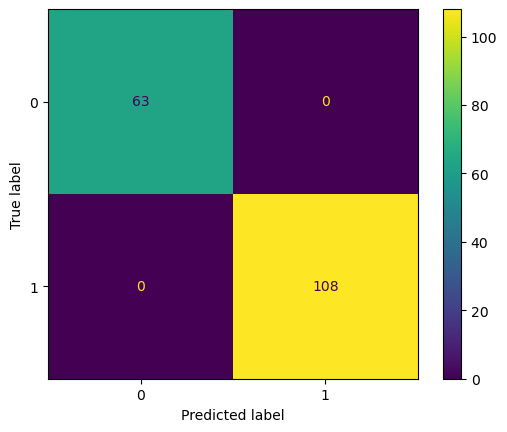

In [66]:
''' Further optimizing model & outputting metrics '''
params_2 = {
    'max_depth': [i for i in range(8, 15, 1)],
    'n_estimators': [i for i in range(200, 600, 100)],  # Limited due to computational expendenture
    'min_samples_split': [i for i in range(5, 8)]
}
grid_search_rf_2 = GridSearchCV(rand_forest_model_1, params_2, cv=5, n_jobs=-1)
grid_search_rf_2.fit(X, y)
print(f"Best Parameters: {grid_search_rf_2.best_estimator_}")
print(f"Best Score: {grid_search_rf_2.best_score_}")
rand_forest_model_optimal_1 = grid_search_rf_2.best_estimator_
print(f"Optimizing Random Forest Score: {rand_forest_model_optimal_1.score(x_test, y_test)}")
y_pred_rf_1 = rand_forest_model_optimal_1.predict(x_test)
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf_1)}")
cm = confusion_matrix(y_test, y_pred_rf_1)
cmDisp2 = ConfusionMatrixDisplay(cm)
cmDisp2.plot()
plt.show()

# Classification of Attached Dataset